In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
import warnings
warnings.filterwarnings('ignore')


In [60]:
with open('/content/drive/MyDrive/cn_hw2_data/out.dimacs10-polbooks', 'r') as file:
    edges = [tuple(map(int, line.strip().split())) for line in file]

In [61]:
graph = {}
num_nodes = 0
num_edges = 0
for s, d in edges:
    if s-1 not in graph:
        num_nodes += 1
        graph[s-1] = []
    if d-1 not in graph:
        num_nodes += 1
        graph[d-1] = []

    num_edges += 1
    graph[s-1].append(d-1)
    graph[d-1].append(s-1)

In [62]:
num_edges

441

In [63]:
import numpy as np

A = np.zeros((num_nodes, num_nodes))
for s, d in edges:
  A[s-1][d-1]=1
  A[d-1][s-1]=1

In [64]:
for node, neighbors in graph.items():
    for neighbor in neighbors:
      A[node, neighbor] = 1

In [65]:
D = np.zeros((num_nodes,num_nodes))
for node, neighbors in graph.items():
  D[node,node] = len(neighbors)

In [66]:
L = D - A

In [67]:
L

array([[ 6., -1., -1., ...,  0.,  0.,  0.],
       [-1.,  4.,  0., ...,  0.,  0.,  0.],
       [-1.,  0.,  4., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  3.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  7.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  5.]])

In [68]:
### obtain the eigenvalues and eigenvectors of the laplacian
eigenvalues, eigenvectors = np.linalg.eig(L)

In [69]:
index = np.argsort(eigenvalues)
sorted_eigenvalues = eigenvalues[index]
sorted_eigenvectors = eigenvectors[:,index]

In [70]:
sorted_eigenvalues

array([3.05841201e-15, 3.23607315e-01, 7.64480671e-01, 1.39014114e+00,
       1.60287332e+00, 1.81029903e+00, 1.89250401e+00, 2.10044318e+00,
       2.17853718e+00, 2.63084779e+00, 2.76657841e+00, 2.84081648e+00,
       2.88371446e+00, 2.88653383e+00, 2.96865938e+00, 3.09918475e+00,
       3.27347119e+00, 3.30476486e+00, 3.33892723e+00, 3.62132877e+00,
       3.63192871e+00, 3.71872054e+00, 3.80634416e+00, 3.92725157e+00,
       4.02083438e+00, 4.07322788e+00, 4.13854286e+00, 4.22682751e+00,
       4.24952030e+00, 4.28173596e+00, 4.34902004e+00, 4.39149924e+00,
       4.45848707e+00, 4.73116025e+00, 4.73743434e+00, 4.80556197e+00,
       5.02819180e+00, 5.05252730e+00, 5.08078438e+00, 5.17158993e+00,
       5.29282448e+00, 5.40607197e+00, 5.45701783e+00, 5.62478170e+00,
       5.72548679e+00, 5.76157025e+00, 5.81362220e+00, 6.08780252e+00,
       6.34755438e+00, 6.40748397e+00, 6.45403899e+00, 6.50759802e+00,
       6.57332155e+00, 6.74268904e+00, 6.80542200e+00, 6.81254881e+00,
      

In [71]:
l2 = sorted_eigenvalues[1]
x2 = sorted_eigenvectors[:,1]

In [72]:
x2 = np.squeeze(np.asarray(x2))
x2_real = [np.real(a) for a in x2]

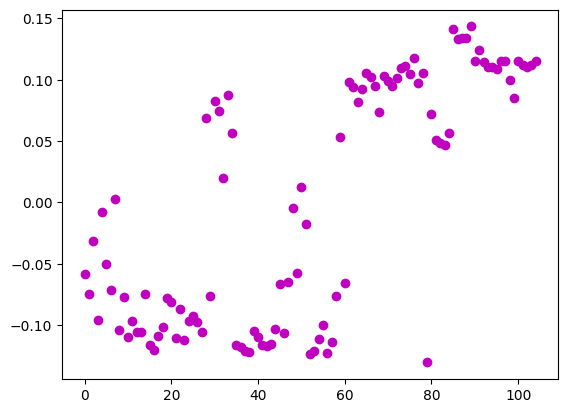

In [73]:
import matplotlib.pyplot as plt
plt.scatter(range(num_nodes),x2_real,c='m')

In [74]:
from sklearn.cluster import KMeans

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(np.array(x2_real).reshape(-1,1))
    distortions.append(kmeanModel.inertia_)

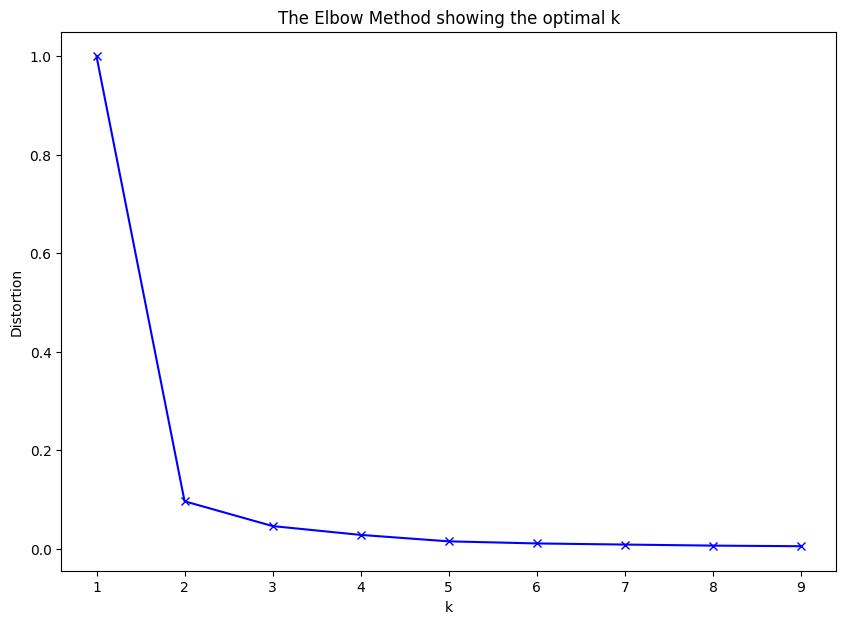

In [75]:
plt.figure(figsize=(10,7))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [76]:

kmeans = KMeans(n_clusters=2).fit(np.array(x2_real).reshape(-1,1))

In [77]:
cluster1 = (np.where(kmeans.labels_==0)[0])
cluster2 = (np.where(kmeans.labels_==1)[0])

In [78]:
cluster1

array([  7,  28,  30,  31,  32,  33,  34,  50,  59,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104])

In [79]:
cluster2

array([ 0,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 35, 36, 37, 38, 39, 40,
       41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58,
       60, 79])

In [80]:
clusters = [cluster1,cluster2]

import itertools

def min_cut(clusters):
  coms = list(itertools.combinations(clusters, 2))
  sum = 0
  for com in coms:
    for i in com[0]:
      for j in com[1]:
              sum+=A[i][j]

  return sum

In [81]:
min_cut(clusters)

20.0

In [83]:
def modularity(clusters,A,num_edges):
  sum = 0
  for cluster in clusters:
    for i in cluster:
      for j in cluster:
        sum+= (A[i][j] - (D[i][i] * D[j][j])) / (2* num_edges)
  sum/= (2* num_edges)
  return sum

In [85]:
modularity(clusters,A,num_edges)

-0.4989202030018074

In [87]:
kmeans = KMeans(n_clusters=3).fit(np.array(x2_real).reshape(-1,1))

In [88]:
cluster1 = (np.where(kmeans.labels_==0)[0])
cluster2 = (np.where(kmeans.labels_==1)[0])
cluster3 = (np.where(kmeans.labels_==2)[0])

In [89]:
clusters = [cluster1,cluster2,cluster3]

In [90]:
min_cut(clusters)

43.0

In [91]:
modularity(clusters,A,num_edges)

-0.4144235169502224

In [92]:
K = range(1,10)
for k in K:
  clusters = []
  kmeans = KMeans(n_clusters=k).fit(np.array(x2_real).reshape(-1,1))
  for c in range(k):
    clusters.append(np.where(kmeans.labels_==c)[0])
  mc = min_cut(clusters)
  m = modularity(clusters,A,num_edges)

  print(f'num_clusters:{k}: min_cut:{mc} modularity:{m}')

num_clusters:1: min_cut:0 modularity:-0.9988662131518167
num_clusters:2: min_cut:20.0 modularity:-0.4989202030018074
num_clusters:3: min_cut:43.0 modularity:-0.41442351695022117
num_clusters:4: min_cut:90.0 modularity:-0.33319964418116976
num_clusters:5: min_cut:138.0 modularity:-0.27731757858093614
num_clusters:6: min_cut:171.0 modularity:-0.22892981833700451
num_clusters:7: min_cut:182.0 modularity:-0.2176613653775933
num_clusters:8: min_cut:234.0 modularity:-0.15666826065271094
num_clusters:9: min_cut:256.0 modularity:-0.14331734205397947


In [94]:
kmeans = KMeans(n_clusters=4).fit(np.array(x2_real).reshape(-1,1))
clusters = []
for c in range(4):
    print(np.where(kmeans.labels_==c)[0])


[ 28  30  31  33  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  80  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104]
[ 3  8 10 11 12 13 15 16 17 18 21 23 24 25 26 27 35 36 37 38 39 40 41 42
 43 44 46 52 53 54 55 56 57 79]
[ 4  7 32 34 48 50 51 59 81 82 83 84]
[ 0  1  2  5  6  9 14 19 20 22 29 45 47 49 58 60]
